In [1]:
import numpy as np
np.random.seed(0)
mean = 0
variance = 2
x = np.random.normal(mean, variance ** 0.5)
y = np.random.normal(mean, variance ** 0.5)
print(f"The x coordinate of a randomly thrown dart is {x:.2f}")
print(f"The y coordinate of a randomly thrown dart is {y:.2f}")

The x coordinate of a randomly thrown dart is 2.49
The y coordinate of a randomly thrown dart is 0.57


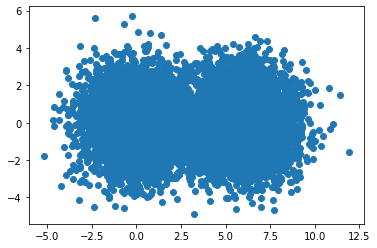

In [2]:
import matplotlib.pyplot as plt
np.random.seed(1)
bulls_eye1 = [0, 0]
bulls_eye2 = [6, 0]
bulls_eyes = [bulls_eye1, bulls_eye2]
x_coordinates, y_coordinates = [], []
for bulls_eye in bulls_eyes:
    for _ in range(5000):
        x = np.random.normal(bulls_eye[0], variance ** 0.5)
        y = np.random.normal(bulls_eye[1], variance ** 0.5)
        x_coordinates.append(x)
        y_coordinates.append(y)

plt.scatter(x_coordinates, y_coordinates)
plt.show()

In [3]:
from scipy.spatial.distance import euclidean
def nearest_bulls_eye(dart):
    distances = [euclidean(dart, bulls_e) for bulls_e in bulls_eyes]
    return np.argmin(distances)

darts = [[0,1], [6, 1]]
for dart in darts:
    index = nearest_bulls_eye(dart)
    print(f"The dart at position {dart} is closest to bulls-eye {index}")

The dart at position [0, 1] is closest to bulls-eye 0
The dart at position [6, 1] is closest to bulls-eye 1


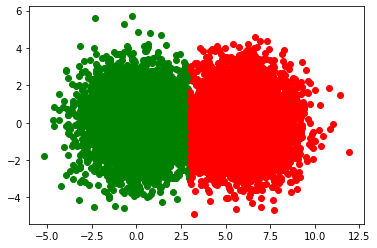

In [4]:
def color_by_cluster(darts):
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                          if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        plt.scatter(x_coordinates, y_coordinates,
                    color=['g', 'r'][bs_index])
    plt.show()

darts = [[x_coordinates[i], y_coordinates[i]]
         for i in range(len(x_coordinates))]
color_by_cluster(darts)

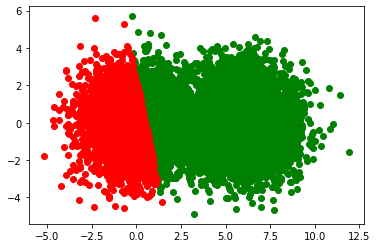

In [5]:
bulls_eyes = np.array(darts[:2])
color_by_cluster(darts)

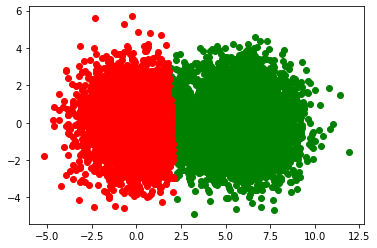

In [6]:
def update_bulls_eyes(darts):
    updated_bulls_eyes = []
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                          if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        mean_center = [np.mean(x_coordinates), np.mean(y_coordinates)]
        updated_bulls_eyes.append(mean_center)

    return updated_bulls_eyes

bulls_eyes = update_bulls_eyes(darts)
color_by_cluster(darts)

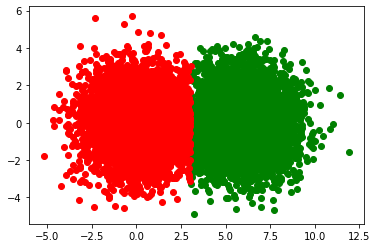

In [7]:
for i in range(10):
    bulls_eyes = update_bulls_eyes(darts)

color_by_cluster(darts)

<h2>10.2  K-Means: A Clustering Algorithm for Grouping Data into K Central Groups

In [8]:
from sklearn.cluster import KMeans
cluster_model = KMeans(n_clusters=2)
assigned_bulls_eyes = cluster_model.fit_predict(darts)

print("Bull's-eye assignments:")
print(assigned_bulls_eyes)

Bull's-eye assignments:
[0 0 0 ... 1 1 1]


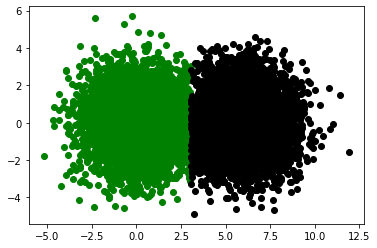

In [9]:
for bs_index in range(len(bulls_eyes)):
    selected_darts = [darts[i] for i in range(len(darts))
                      if bs_index == assigned_bulls_eyes[i]]
    x_coordinates, y_coordinates = np.array(selected_darts).T
    plt.scatter(x_coordinates, y_coordinates,
                color=['g', 'k'][bs_index])
plt.show()

In [10]:
new_darts = [[500, 500], [-500, -500]]
new_bulls_eye_assignments = cluster_model.predict(new_darts)
for i, dart in enumerate(new_darts):
    bulls_eye_index = new_bulls_eye_assignments[i]
    print(f"Dart at {dart} is closest to bull's-eye {bulls_eye_index}")

Dart at [500, 500] is closest to bull's-eye 1
Dart at [-500, -500] is closest to bull's-eye 0


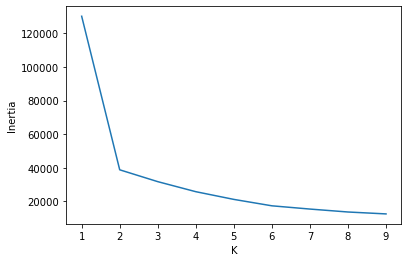

In [11]:
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(darts).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

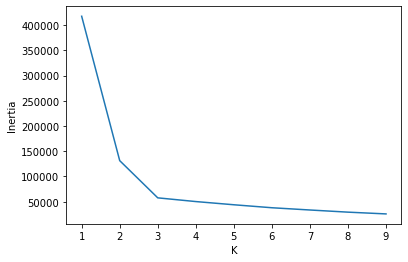

In [12]:
new_bulls_eye = [12, 0]
for _ in range(5000):
    x = np.random.normal(new_bulls_eye[0], variance ** 0.5)
    y = np.random.normal(new_bulls_eye[1], variance ** 0.5)
    darts.append([x, y])

inertia_values = [KMeans(k).fit(darts).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

<h2>10.3  Using Density to Discover Clusters

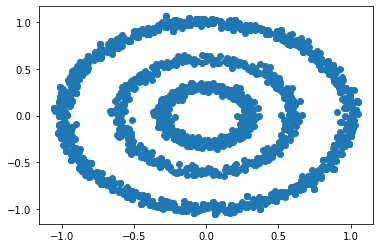

In [13]:
from sklearn.datasets import make_circles

x_coordinates = []
y_coordinates = []
for factor in [.3, .6, 0.99]:
    rock_ring, _ = make_circles(n_samples=800, factor=factor,
                                noise=.03, random_state=1)
    for rock in rock_ring:
        x_coordinates.append(rock[0])
        y_coordinates.append(rock[1])

plt.scatter(x_coordinates, y_coordinates)
plt.show()

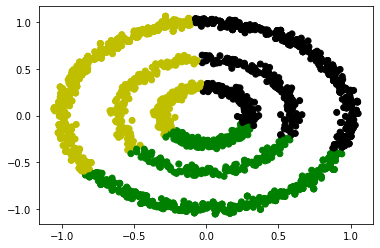

In [14]:
rocks = [[x_coordinates[i], y_coordinates[i]]
          for i in range(len(x_coordinates))]
rock_clusters = KMeans(3).fit_predict(rocks)

colors = [['g', 'y', 'k'][cluster] for cluster in  rock_clusters]
plt.scatter(x_coordinates, y_coordinates, color=colors)
plt.show()

In [15]:
epsilon=0.1
min_points = 10
neighbor_indices = [i for i, rock in enumerate(rocks[1:])
                    if euclidean(rocks[0], rock) <= epsilon]
num_neighbors = len(neighbor_indices)
print(f"The rock at index 0 has {num_neighbors} neighbors.")

if num_neighbors >= min_points:
    print("It lies in a dense region.")
else:
    print("It does not lie in a dense region.")

The rock at index 0 has 40 neighbors.
It lies in a dense region.


In [16]:
dense_region_indices = [0] + neighbor_indices
dense_region_cluster = [rocks[i] for i in dense_region_indices]
dense_cluster_size = len(dense_region_cluster)
print(f"We found a dense cluster containing {dense_cluster_size} rocks")

We found a dense cluster containing 41 rocks


In [17]:
dense_region_indices = set(dense_region_indices)
for index in neighbor_indices:
    point = rocks[index]
    neighbors_of_neighbors = [i for i, rock in enumerate(rocks)
                              if euclidean(point, rock) <= epsilon]
    if len(neighbors_of_neighbors) >= min_points:
        dense_region_indices.update(neighbors_of_neighbors)

dense_region_cluster = [rocks[i] for i in dense_region_indices]
dense_cluster_size = len(dense_region_cluster)
print(f"We expanded our cluster to include {dense_cluster_size} rocks")

We expanded our cluster to include 781 rocks


<h2>10.4  DBSCAN: A Clustering Algorithm for Grouping Data Based on Spatial Density

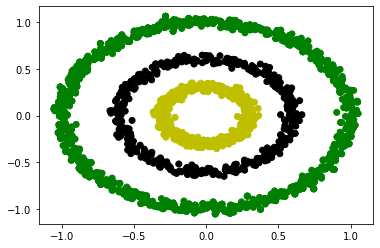

In [18]:
from sklearn.cluster import DBSCAN
cluster_model = DBSCAN(eps=epsilon, min_samples=min_points)
rock_clusters = cluster_model.fit_predict(rocks)
colors = [['g', 'y', 'k'][cluster] for cluster in rock_clusters]
plt.scatter(x_coordinates, y_coordinates, color=colors)
plt.show()

In [19]:
noisy_data = rocks + [[1000, -1000]]
clusters = DBSCAN(eps=epsilon,
                  min_samples=min_points).fit_predict(noisy_data)
assert clusters[-1] == -1

In [20]:
def manhattan_distance(point_a, point_b):
    num_blocks = np.sum(np.absolute(point_a - point_b))
    return .17 * num_blocks

x = np.array([34, 5])
y = np.array([57, 8])
distance = manhattan_distance(x, y)

print(f"Manhattan distance is {distance} miles")

Manhattan distance is 4.42 miles


Point at index 0 is in cluster 0
Point at index 1 is in cluster 0
Point at index 2 is in cluster 0
Point at index 3 is an outlier
Point at index 4 is an outlier


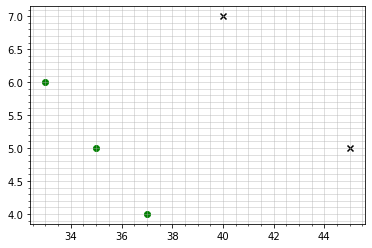

In [21]:
points = [[35, 5], [33, 6], [37, 4], [40, 7], [45, 5]]
clusters = DBSCAN(eps=1, min_samples=3,
                  metric=manhattan_distance).fit_predict(points)

for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"Point at index {i} is an outlier")
        plt.scatter(point[0], point[1], marker='x', color='k')
    else:
        print(f"Point at index {i} is in cluster {cluster}")
        plt.scatter(point[0], point[1], color='g')

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()


plt.show()

In [22]:
def ridiculous_measure(point_a, point_b):
    is_negative_a = np.array(point_a) < 0
    is_negative_b = np.array(point_b) < 0
    if is_negative_a.all() and is_negative_b.all():
        return 0
    elif is_negative_a.any() and is_negative_b.any():
        return 10
    else:
        return 2

points = [[-1, -1], [-10, -10], [-1000, -13435], [3,5], [5,-7]]

clusters = DBSCAN(eps=.1, min_samples=2,
                  metric=ridiculous_measure).fit_predict(points)

for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"{point} is an outlier")
    else:
        print(f"{point} falls in cluster {cluster}")

[-1, -1] falls in cluster 0
[-10, -10] falls in cluster 0
[-1000, -13435] falls in cluster 0
[3, 5] is an outlier
[5, -7] is an outlier


<h2>10.5  Analyzing Clusters Using Pandas

In [23]:
import pandas as pd
x_coordinates, y_coordinates = np.array(rocks).T
df = pd.DataFrame({'X': x_coordinates, 'Y': y_coordinates,
                   'Cluster': rock_clusters})

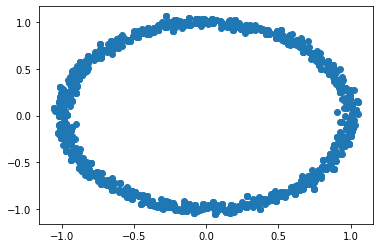

In [24]:
df_cluster = df[df.Cluster == 0]
plt.scatter(df_cluster.X, df_cluster.Y)
plt.show()

Skipping over cluster 0
Plotting cluster 1
Plotting cluster 2


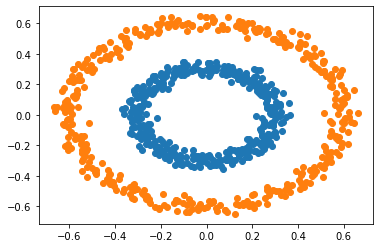

In [25]:
for cluster_id, df_cluster in df.groupby('Cluster'):
    if cluster_id == 0:
        print(f"Skipping over cluster {cluster_id}")
        continue

    print(f"Plotting cluster {cluster_id}")
    plt.scatter(df_cluster.X, df_cluster.Y)


plt.show()

<h1>11 Geographic Location Visualization and Analysis

In [26]:
from math import cos, sin, asin

def great_circle_distance(x1, y1, x2, y2):
    delta_x, delta_y = x2 - x1, y2 - y2
    haversin = sin(delta_x / 2) ** 2 + np.product([cos(x1), cos(x2),
                                                   sin(delta_y / 2) ** 2])
    return 2 * asin(haversin ** 0.5)

In [27]:
from math import pi
distance = great_circle_distance(0, 0, pi, pi)
print(f"The distance equals {distance} units")

The distance equals 3.141592653589793 units


In [28]:
latitude_north, longitude_north = (90.0, 0)
latitude_south, longitude_south = (-90.0, 0)
to_radians =  np.radians([latitude_north, longitude_north,
                          latitude_south, longitude_south])
distance = great_circle_distance(*to_radians.tolist())
print(f"The unit-circle distance between poles equals {distance} units")

The unit-circle distance between poles equals 3.141592653589793 units


In [29]:
earth_distance = 3956 * distance
print(f"The distance between poles equals {earth_distance} miles")

The distance between poles equals 12428.14053760122 miles


In [30]:
def travel_distance(lat1, lon1, lat2, lon2):
    to_radians =  np.radians([lat1, lon1, lat2, lon2])
    return 3956 * great_circle_distance(*to_radians.tolist())

assert travel_distance(90, 0, -90, 0) == earth_distance

<h2>11.3  Location Tracking Using GeoNamesCache

In [32]:
from geonamescache import GeonamesCache
gc = GeonamesCache()
continents = gc.get_continents()
print(continents.keys())

dict_keys(['AF', 'AS', 'EU', 'NA', 'OC', 'SA', 'AN'])


In [33]:
north_america = continents['NA']
print(north_america.keys())

dict_keys(['lng', 'geonameId', 'timezone', 'bbox', 'toponymName', 'asciiName', 'astergdem', 'fcl', 'population', 'wikipediaURL', 'adminName5', 'srtm3', 'adminName4', 'adminName3', 'alternateNames', 'cc2', 'adminName2', 'name', 'fclName', 'fcodeName', 'adminName1', 'lat', 'fcode', 'continentCode'])


In [34]:
countries = gc.get_countries()
num_countries = len(countries)
print(f"GeonamesCache holds data for {num_countries} countries.")

us_data = countries['US']
print("The following data pertains to the United States:")
print(us_data)

GeonamesCache holds data for 252 countries.
The following data pertains to the United States:
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}


In [35]:
us_neighbors = us_data['neighbours']
for neighbor_code in us_neighbors.split(','):
    print(countries[neighbor_code]['name'])

Canada
Mexico
Cuba


In [36]:
cities = gc.get_cities()
num_cities = len(cities)
print(f"GeoNamesCache holds data for {num_cities} total cities")
city_id = list(cities.keys())[0]
print(cities[city_id])

GeoNamesCache holds data for 24474 total cities
{'geonameid': 3041563, 'name': 'Andorra la Vella', 'latitude': 42.50779, 'longitude': 1.52109, 'countrycode': 'AD', 'population': 20430, 'timezone': 'Europe/Andorra', 'admin1code': '07', 'alternatenames': ['ALV', 'Ando-la-Vyey', 'Andora', 'Andora la Vela', 'Andora la Velja', "Andora lja Vehl'ja", 'Andoro Malnova', 'Andorra', 'Andorra Tuan', 'Andorra a Vella', 'Andorra la Biella', 'Andorra la Vella', 'Andorra la Vielha', 'Andorra-a-Velha', "Andorra-la-Vel'ja", 'Andorra-la-Vielye', 'Andorre-la-Vieille', 'Andò-la-Vyèy', 'Andòrra la Vièlha', 'an dao er cheng', 'andolalabeya', 'andwra la fyla', 'Ανδόρρα', 'Андора ла Веля', 'Андора ла Веља', 'Андора ля Вэлья', 'Андорра-ла-Велья', 'אנדורה לה וולה', 'أندورا لا فيلا', 'አንዶራ ላ ቬላ', 'アンドラ・ラ・ヴェリャ', '安道爾城', '안도라라베야']}


In [37]:
us_cities = [city for city in cities.values()
             if city['countrycode'] == 'US']
num_us_cities = len(us_cities)
print(f"GeoNamesCache holds data for {num_us_cities} US cities.")

GeoNamesCache holds data for 3248 US cities.


In [52]:
matched_cities_by_name = gc.get_cities_by_name('Khawr Fakkān')
print(matched_cities_by_name)

[{'291696': {'geonameid': 291696, 'name': 'Khawr Fakkān', 'latitude': 25.33132, 'longitude': 56.34199, 'countrycode': 'AE', 'population': 40677, 'timezone': 'Asia/Dubai', 'admin1code': '06', 'alternatenames': ['Fakkan', 'Fakkān', 'Khawr Fakkan', 'Khawr Fakkān', 'Khawr al Fakkan', 'Khawr al Fakkān', 'Khor Fakhan', 'Khor Fakkan', 'Khor Fakkan City', 'Khor Fakkān', 'Khor al Fakhan', 'Khor al Fakkan', 'Khor al Fākhān', "Khor'fakkan", 'Khor-Fakkan', 'Khorfakan', 'Khorfakhan', 'Port Khor Fakkan', 'mdynt khwr fkan', 'Хор-Факкан', 'مدينة خور فكان']}}]


In [51]:
from unidecode import unidecode
accented_names = [city['name'] for city in gc.get_cities().values()
                  if city['name'] != unidecode(city['name'])]
num_accented_cities = len(accented_names)

print(f"An example accented city name is '{accented_names[0]}'")
print(f"{num_accented_cities} cities have accented names")

An example accented city name is 'Khawr Fakkān'
4909 cities have accented names


<h2>11.4  Matching Location Names in Text

In [55]:
import re
regex = 'Boston'
random_text = 'Clown Patty'
match = re.search(regex, random_text)
assert match is None

matchable_text = 'Boston Marathon'
match = re.search(regex, matchable_text)
assert match is not None
start, end = match.start(), match.end()
matched_string = matchable_text[start: end]
assert matched_string == 'Boston'

In [56]:
regex = r'I visited \b(Boston|Philadelphia|San Francisco)\b yesterday.'
assert re.search(regex, 'I visited Chicago yesterday.') is None

cities = ['Boston', 'Philadelphia', 'San Francisco']
for city in cities:
    assert re.search(regex, f'I visited {city} yesterday.') is not None

In [57]:
compiled_re = re.compile(regex)
text = 'I visited Boston yesterday.'
for i in range(1000):
    assert compiled_re.search(text) is not None

<h1>12 Case Study 3 Solution

In [58]:
headline_file = open('headlines.txt','r')
headlines = [line.strip()
             for line in headline_file.readlines()]
num_headlines = len(headlines)
print(f"{num_headlines} headines have been loaded")

650 headines have been loaded


In [59]:
def name_to_regex(name):
    decoded_name = unidecode(name)
    if name != decoded_name:
        regex = fr'\b({name}|{decoded_name})\b'
    else:
        regex = fr'\b{name}\b'
    return re.compile(regex, flags=re.IGNORECASE)

In [60]:
countries = [country['name']
             for country in gc.get_countries().values()]
country_to_name = {name_to_regex(name): name
                   for name in countries}

cities = [city['name'] for city in gc.get_cities().values()]
city_to_name = {name_to_regex(name): name for name in cities}

In [61]:
def get_name_in_text(text, dictionary):
    for regex, name in sorted(dictionary.items(),
                              key=lambda x: x[1]):
        if regex.search(text):
            return name
    return None

In [62]:
import pandas as pd

matched_countries = [get_name_in_text(headline, country_to_name)
                     for headline in headlines]
matched_cities = [get_name_in_text(headline, city_to_name)
                  for headline in headlines]
data = {'Headline': headlines, 'City': matched_cities,
        'Country': matched_countries}
df = pd.DataFrame(data)

In [63]:
summary = df[['City', 'Country']].describe()
print(summary)

       City Country
count   617      15
unique  509      10
top      Of  Brazil
freq     45       3


In [64]:
of_cities = df[df.City == 'Of'][['City', 'Headline']]
ten_of_cities = of_cities.head(10)
print(ten_of_cities.to_string(index=False))

City                                                                 Headline
  Of                                    Case of Measles Reported in Vancouver
  Of  Authorities are Worried about the Spread of Bronchitis in Silver Spring
  Of      Authorities are Worried about the Spread of Mad Cow Disease in Rome
  Of                     Rochester authorities confirmed the spread of Dengue
  Of                           Tokyo Encounters Severe Symptoms of Meningitis
  Of        Authorities are Worried about the Spread of Influenza in Savannah
  Of                                  Spike of Pneumonia Cases in Springfield
  Of                      The Spread of Measles in Spokane has been Confirmed
  Of                                          Outbreak of Zika in Panama City
  Of                          Urbana Encounters Severe Symptoms of Meningitis


In [65]:
def get_cities_in_headline(headline):
    cities_in_headline = set()
    for regex, name in city_to_name.items():
        match = regex.search(headline)
        if match:
            if headline[match.start()].isupper():
                cities_in_headline.add(name)

    return list(cities_in_headline)

df['Cities'] = df['Headline'].apply(get_cities_in_headline)
df['Num_cities'] = df['Cities'].apply(len)
df_multiple_cities = df[df.Num_cities > 1]
num_rows, _ = df_multiple_cities.shape
print(f"{num_rows} headlines match multiple cities")

69 headlines match multiple cities


In [66]:
ten_cities = df_multiple_cities[['Cities', 'Headline']].head(10)
print(ten_cities.to_string(index=False))

                        Cities                                                    Headline
         [New York City, York]                             Could Zika Reach New York City?
          [Miami Beach, Miami]                           First Case of Zika in Miami Beach
               [San Juan, San]  San Juan reports 1st U.S. Zika-related death amid outbreak
    [Los Angeles, Los Ángeles]                        New Los Angeles Hairstyle goes Viral
                  [Tampa, Bay]                       Tampa Bay Area Zika Case Count Climbs
        [Ho Chi Minh City, Ho]              Zika cases in Vietnam's Ho Chi Minh City surge
              [San Diego, San]                    Key Zika Findings in San Diego Institute
           [Hīt, Kuala Lumpur]                          Kuala Lumpur is Hit By Zika Threat
          [San Francisco, San]                            Zika Virus Reaches San Francisco
 [Salvador, San Salvador, San]                                Zika worries in San Salvador

In [67]:
def get_longest_city(cities):
    if cities:
        return max(cities, key=len)
    return None

df['City'] = df['Cities'].apply(get_longest_city)

In [68]:
short_cities = df[df.City.str.len() <= 4][['City', 'Headline']]
print(short_cities.to_string(index=False))

 City                                                             Headline
 Lima                                  Lima tries to address Zika Concerns
 Pune                                       Pune woman diagnosed with Zika
 Rome  Authorities are Worried about the Spread of Mad Cow Disease in Rome
 Molo                                  Molo Cholera Spread Causing Concern
 Miri                                                 Zika arrives in Miri
 Nadi                 More people in Nadi are infected with HIV every year
 Baud        Rumors about Tuberculosis Spreading in Baud have been Refuted
 Kobe                                       Chikungunya re-emerges in Kobe
 Waco                                  More Zika patients reported in Waco
 Erie                                          Erie County sets Zika traps
 Kent                                         Kent is infested with Rabies
 Reno                   The Spread of Gonorrhea in Reno has been Confirmed
 Sibu                    

In [69]:
df_countries = df[df.Country.notnull()][['City',
                                         'Country',
                                         'Headline']]
print(df_countries.to_string(index=False))

             City    Country                                                               Headline
           Recife     Brazil                                Mystery Virus Spreads in Recife, Brazil
 Ho Chi Minh City    Vietnam                         Zika cases in Vietnam's Ho Chi Minh City surge
          Bangkok   Thailand                                         Thailand-Zika Virus in Bangkok
       Piracicaba     Brazil                                    Zika outbreak in Piracicaba, Brazil
            Klang   Malaysia                                       Zika surfaces in Klang, Malaysia
   Guatemala City  Guatemala  Rumors about Meningitis spreading in Guatemala City have been refuted
      Belize City     Belize                                     Belize City under threat from Zika
         Campinas     Brazil                                       Student sick in Campinas, Brazil
      Mexico City     Mexico                                   Zika outbreak spreads to Mexico City


In [70]:
df.drop('Country', axis=1, inplace=True)

In [71]:
df_unmatched = df[df.City.isnull()]
num_unmatched = len(df_unmatched)
print(f"{num_unmatched} headlines contain no city matches.")
print(df_unmatched.head(10)[['Headline']].values)

41 headlines contain no city matches.
[['Louisiana Zika cases up to 26']
 ['Zika infects pregnant woman in Cebu']
 ['Spanish Flu Sighted in Antigua']
 ['Zika case reported in Oton']
 ['Hillsborough uses innovative trap against Zika 20 minutes ago']
 ['Maka City Experiences Influenza Outbreak']
 ['West Nile Virus Outbreak in Saint Johns']
 ['Syphilis Hits Jefferson']
 ['Malaria Exposure in Sussex']
 ['Greenwich Establishes Zika Task Force']]


In [72]:
df = df[~df.City.isnull()][['City', 'Headline']]

In [73]:
latitudes, longitudes = [], []
for city_name in df.City.values:
    city = max(gc.get_cities_by_name(city_name),
              key=lambda x: list(x.values())[0]['population'])
    city = list(city.values())[0]
    latitudes.append(city['latitude'])
    longitudes.append(city['longitude'])

df = df.assign(Latitude=latitudes, Longitude=longitudes)

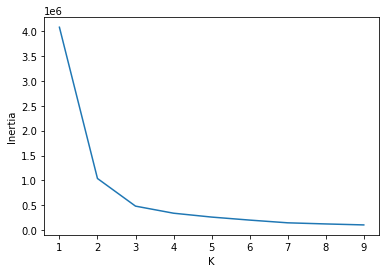

In [74]:
coordinates = df[['Latitude', 'Longitude']].values
k_values = range(1, 10)
inertia_values = []
for k in k_values:
    inertia_values.append(KMeans(k).fit(coordinates).inertia_)

plt.plot(range(1, 10), inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [76]:
def great_circle_distance(coord1, coord2, radius=3956):
    if np.array_equal(coord1, coord2):
        return 0.0

    coord1, coord2 = np.radians(coord1), np.radians(coord2)
    delta_x, delta_y = coord2 - coord1
    haversin = sin(delta_x / 2) ** 2 + np.product([cos(coord1[0]),
                                                   cos(coord2[0]),
                                                   sin(delta_y / 2) ** 2])
    return  2 * radius * asin(haversin ** 0.5)

In [77]:
metric = great_circle_distance
dbscan = DBSCAN(eps=250, min_samples=3, metric=metric)
df['Cluster'] = dbscan.fit_predict(coordinates)

In [78]:
def get_country_code(city_name):
    city = max(gc.get_cities_by_name(city_name),
               key=lambda x: list(x.values())[0]['population'])
    return list(city.values())[0]['countrycode']

df['Country_code'] = df.City.apply(get_country_code)

In [80]:
df_us = df[df.Country_code == 'US']
df_not_us = df[df.Country_code != 'US']

In [81]:
def re_cluster(input_df, eps):
    input_coord = input_df[['Latitude', 'Longitude']].values
    dbscan = DBSCAN(eps=eps, min_samples=3,
                    metric=great_circle_distance)
    clusters = dbscan.fit_predict(input_coord)
    input_df = input_df.assign(Cluster=clusters)
    return input_df[input_df.Cluster > -1]

df_not_us = re_cluster(df_not_us, 250)
df_us = re_cluster(df_us, 125)

In [82]:
groups = df_not_us.groupby('Cluster')
num_groups = len(groups)
print(f"{num_groups} Non-US have been clusters detected")

32 Non-US have been clusters detected


In [83]:
sorted_groups = sorted(groups, key=lambda x: len(x[1]),
                       reverse=True)
group_id, largest_group = sorted_groups[0]
group_size = len(largest_group)
print(f"Largest cluster contains {group_size} headlines")

Largest cluster contains 51 headlines


In [84]:
def compute_centrality(group):
    group_coords = group[['Latitude', 'Longitude']].values
    center = group_coords.mean(axis=0)
    distance_to_center = [great_circle_distance(center, coord)
                          for coord in group_coords]
    group['Distance_to_center'] = distance_to_center

In [85]:
def sort_by_centrality(group):
    compute_centrality(group)
    return group.sort_values(by=['Distance_to_center'], ascending=True)

largest_group = sort_by_centrality(largest_group)
for headline in largest_group.Headline.values[:5]:
    print(headline)

Mad Cow Disease Disastrous to Brussels
Scientists in Paris to look for answers
More Livestock in Fontainebleau are infected with Mad Cow Disease
Mad Cow Disease Hits Rotterdam
Contaminated Meat Brings Trouble for Bonn Farmers


In [87]:
from collections import Counter
def top_countries(group):
    countries = [gc.get_countries()[country_code]['name']
                 for country_code in group.Country_code.values]
    return Counter(countries).most_common(3)


print(top_countries(largest_group))

[('United Kingdom', 19), ('France', 7), ('Germany', 6)]


In [88]:
for _, group in sorted_groups[1:5]:
    sorted_group = sort_by_centrality(group)
    print(top_countries(sorted_group))
    for headline in sorted_group.Headline.values[:5]:
        print(headline)
    print('\n')

[('Philippines', 16)]
Zika afflicts patient in Calamba
Hepatitis E re-emerges in Santa Rosa
More Zika patients reported in Indang
Batangas Tourism Takes a Hit as Virus Spreads
Spreading Zika reaches Bacoor


[('Thailand', 5), ('Cambodia', 3), ('Vietnam', 2)]
More Zika patients reported in Chanthaburi
Thailand-Zika Virus in Bangkok
Zika case reported in Phetchabun
Zika arrives in Udon Thani
More Zika patients reported in Kampong Speu


[('El Salvador', 3), ('Honduras', 2), ('Guatemala', 2)]
Santa Barbara tests new cure for Hepatitis C
Zika Reported in Ilopango
More Zika cases in Soyapango
Zika worries in San Salvador
Zika arrives in Tegucigalpa


[('Canada', 10)]
Rumors about Pneumonia spreading in Ottawa have been refuted
More people in Toronto are infected with Hepatitis E every year
St. Catharines Patient in Critical Condition after Contracting Dengue
Varicella has Arrived in Milton
Rabies Exposure in Hamilton




In [89]:
us_groups = df_us.groupby('Cluster')
us_sorted_groups = sorted(us_groups, key=lambda x: len(x[1]),
                         reverse=True)
for _, group in us_sorted_groups[:5]:
    sorted_group = sort_by_centrality(group)
    for headline in sorted_group.Headline.values[:5]:
        print(headline)
    print('\n')

Schools in Bridgeton Closed Due to Mumps Outbreak
Philadelphia experts track pandemic
Vineland authorities confirmed the spread of Chlamydia
Baltimore plans for Zika virus
Will Swine Flu vaccine help Annapolis?


Rhinovirus Hits Bakersfield
Schools in Tulare Closed Due to Mumps Outbreak
New medicine wipes out West Nile Virus in Ventura
New medicine wipes out Measles in Fresno
Authorities are Worried about the Spread of Varicella in Clovis


Bradenton Experiences Zika Troubles
New Zika Case Confirmed in Sarasota County
Tampa Bay Area Zika Case Count Climbs
Zika Strikes St. Petersburg
Zika spreads to Plant City


How to Avoid Hepatitis E in South Bend
Hepatitis E Hits Hammond
Chicago's First Zika Case Confirmed
Rumors about Hepatitis C spreading in Darien have been refuted
Rumors about Rotavirus Spreading in Joliet have been Refuted


More Zika patients reported in Fort Worth
Outbreak of Zika in Stephenville
Zika symptoms spotted in Arlington
Dallas man comes down with case of Zika
Zika 